In [2]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 추가교차검증 종류

## 1. ShuffleSplit

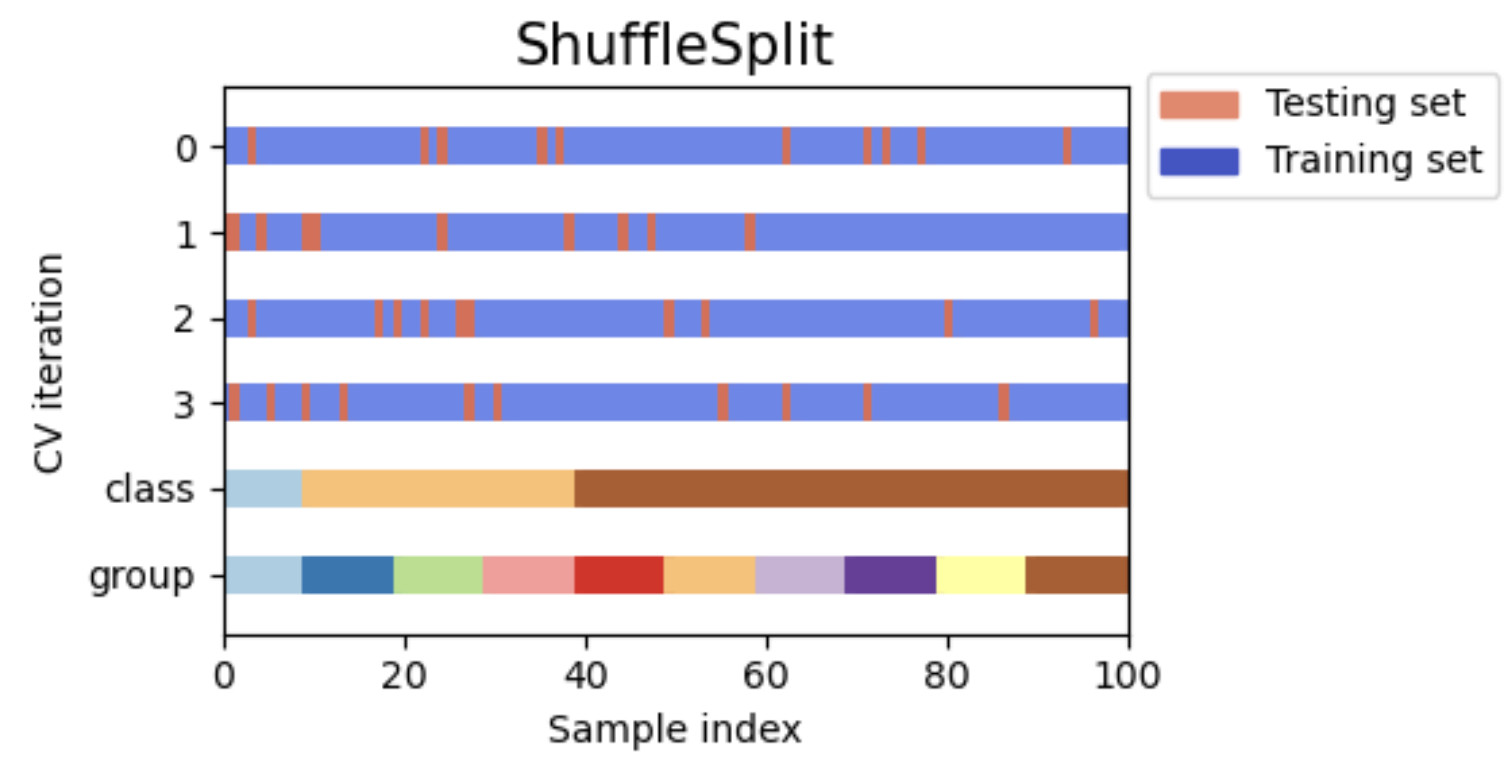


- 샘플을 먼저 섞은 후 train/test data로 나눔

- 데이터들이 독립적이고 동일한 분포를 가진 경우 사용

- 반복 횟수를 train/test set의 크기를 독립적으로 조절해야 할 때 유용(데이터셋의 크기와 비율을 어떻게 설정해도 반복 횟수는 그 영향을 받지 않음).

- train_size와 test_size를 지정할 수 있는데, 각각 훈련 데이터셋과 테스트 데이터셋 사이즈를 의미

- train_size와 test_size의 합을 전체 데이터의 개수와 다르게 하거나 비율의 합을 1보다 작게 하여 전체 데이터의 일부만 사용 가능 -> 이러한 부분 샘플링은 대규모 데이터 셋으로 작업할 때 유용함

- train_size와 test_size에 정수를 입력시 데이터의 개수, 실수를 입력시 훈련 데이터셋과 테스트 데이터셋의 비율







In [38]:
from sklearn.model_selection import ShuffleSplit

X = np.arange(10)
y = np.array([0,0,0,0,0,1,1,1,1,1])
ss = ShuffleSplit(n_splits=5, train_size = 7, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X,y):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


## 2. Stratified Shuffle & Split

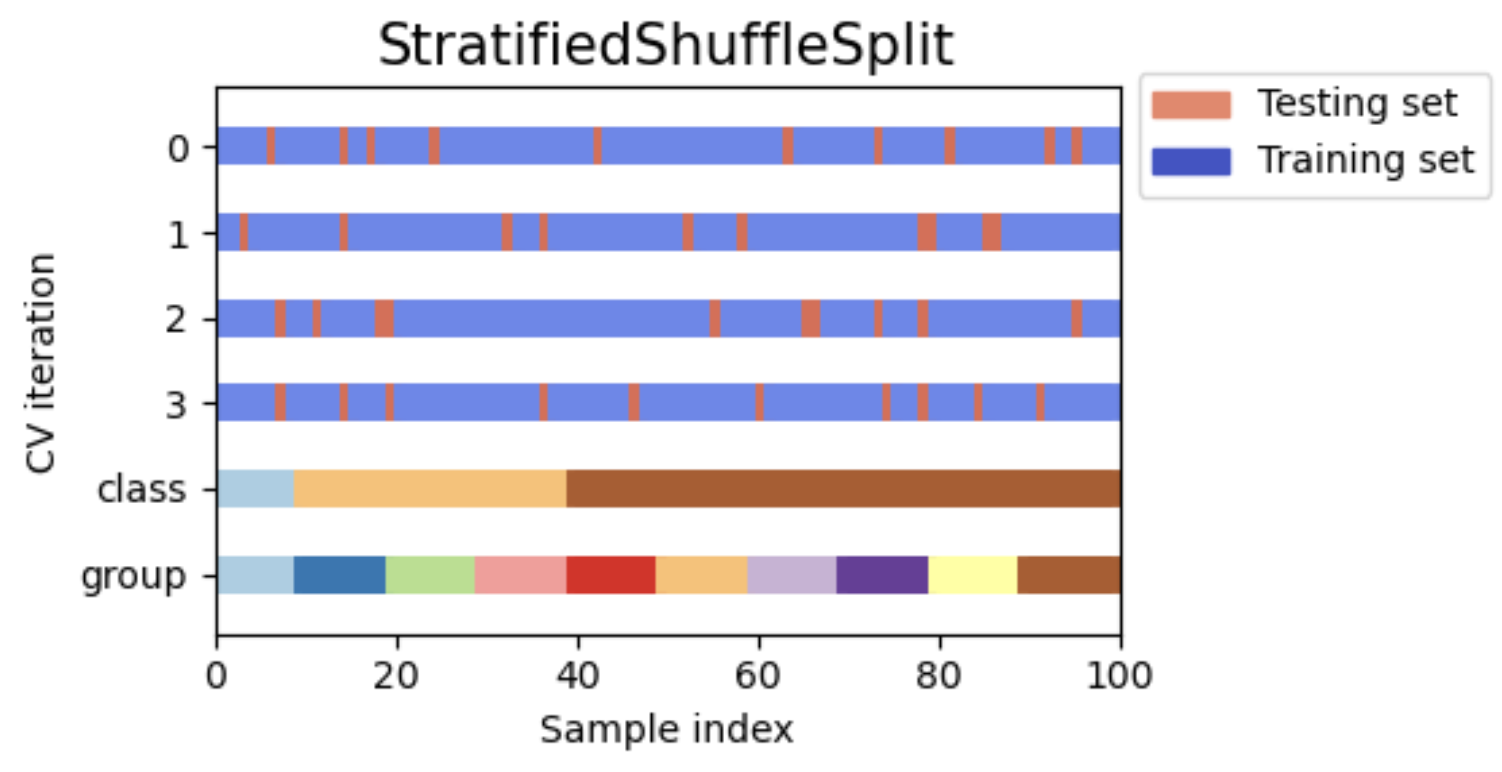

- 계층화된 분할을 반환하는 Shuffle&Split의 변형으로, 전체 집합에서와 같이 각 대상 클래스에 대해 동일한 비율을 보존하여 분할 생성




In [40]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
for train_index, test_index in sss.split(X,y):
  print("%s %s" % (train_index, test_index))

[5 2 3] [4 1 0]
[5 1 4] [0 2 3]
[5 0 2] [4 3 1]
[4 1 0] [2 3 5]
[0 5 1] [3 4 2]


## 3. Leave One Out(LOO) / Leave P out(LPO)

- 데이터들이 독립적이고 동일한 분포를 가진 경우 사용
- LPO는 전체 데이터 세트에서 p개의 샘플을 제거해 모든 훈련/검증 데이터 생성, p=1인 경우가 LOO
- 데이터 수가 적을 때 많은 데이터의 낭비를 막기 위해 사용

In [30]:
# LPO
from sklearn.model_selection import LeavePOut

X = np.ones(5)
lpo = LeavePOut(p=3)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

[3 4] [0 1 2]
[2 4] [0 1 3]
[2 3] [0 1 4]
[1 4] [0 2 3]
[1 3] [0 2 4]
[1 2] [0 3 4]
[0 4] [1 2 3]
[0 3] [1 2 4]
[0 2] [1 3 4]
[0 1] [2 3 4]


In [31]:
# LOO
from sklearn.model_selection import LeaveOneOut

X = np.ones(5)
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3 4] [0]
[0 2 3 4] [1]
[0 1 3 4] [2]
[0 1 2 4] [3]
[0 1 2 3] [4]


## 4. GroupKFold

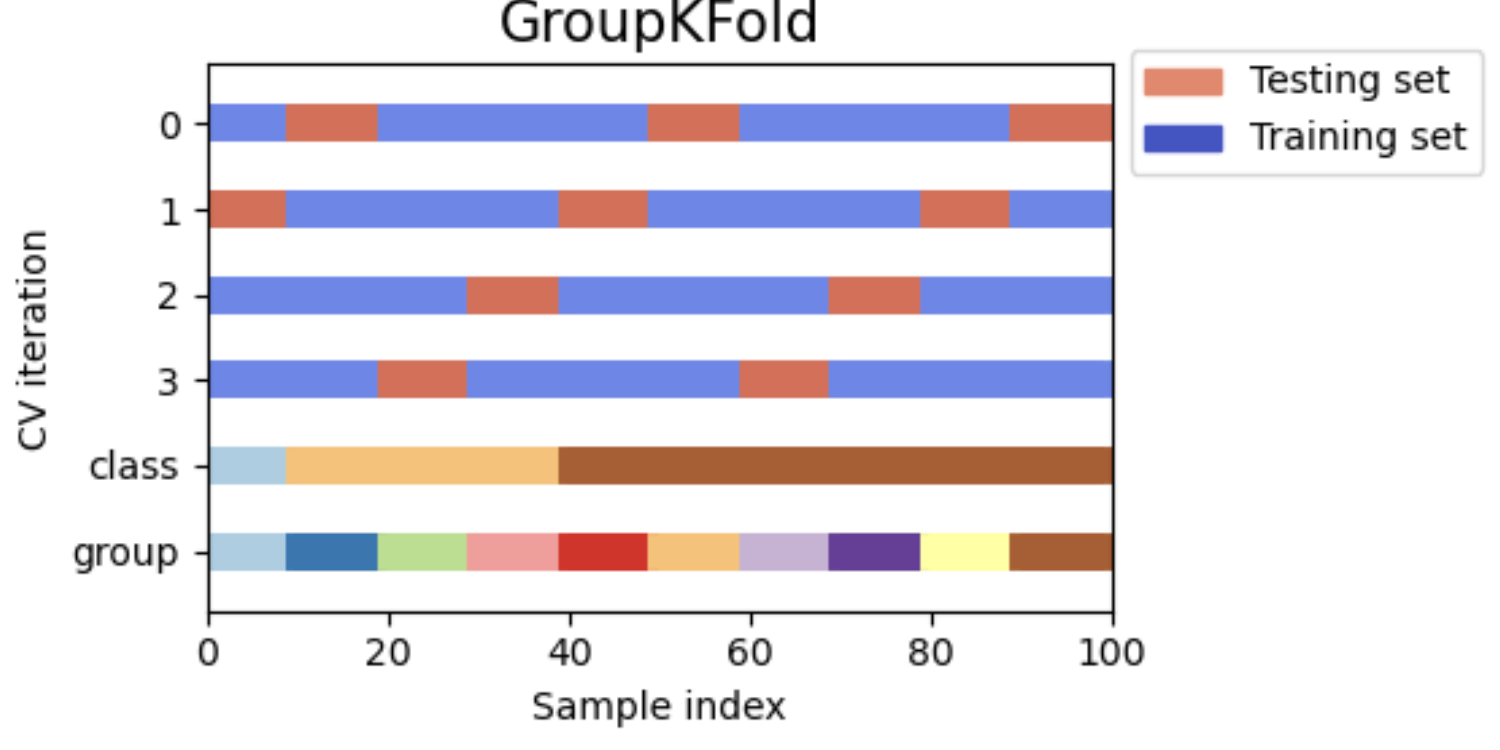

- 데이터 안에 연관된 데이터가 그룹으로 있을 경우 사용

- groups array를 만들어서 훈련 데이터셋과 테스트 데이터셋을 만들 때 같은 그룹으로 지정한 데이터들이 분리되지 않고 동시에 훈련 데이터셋이나 테스트 데이터셋에 들어갈 수 있도록 한다


In [41]:
from sklearn.model_selection import GroupKFold

X = np.arange(10)
y = np.array(["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))


[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


## 5. Leave P Groups Out(LPGO) / Leave One Group Out(LOGO)

- LOO와 비슷한 방법으로, 하나의 그룹을 남겨두고 나머지 그룹으로 학습 데이터 구성(LOGO) -> P개의 그룹을 남겨두면 LPGO

In [42]:
from sklearn.model_selection import LeaveOneGroupOut

X = [1, 5, 10, 50, 60, 70, 80]
y = [0, 1, 1, 2, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3, 3]
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


## 6. RepeatedKFold / RepeatedStratifiedKFold

- 데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러번 수행

- KFold의 일종으로, 회귀 모델에는 RepeatedKFold / 분류 모델에는 RepeatedStratifiedKFold를 사용




In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 0

# RepeatedKFold
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
print("RepeatedKFold")
for train, test in rkf.split(X):
    print("%s %s" % (train, test))
print()

# RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=random_state)
print("RepeatedStratifiedKFold")
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

RepeatedKFold
[0 1] [2 3]
[2 3] [0 1]
[1 3] [0 2]
[0 2] [1 3]

RepeatedStratifiedKFold
[0 1] [2 3]
[2 3] [0 1]
[1 3] [0 2]
[0 2] [1 3]


## 7. Group Shuffle Split

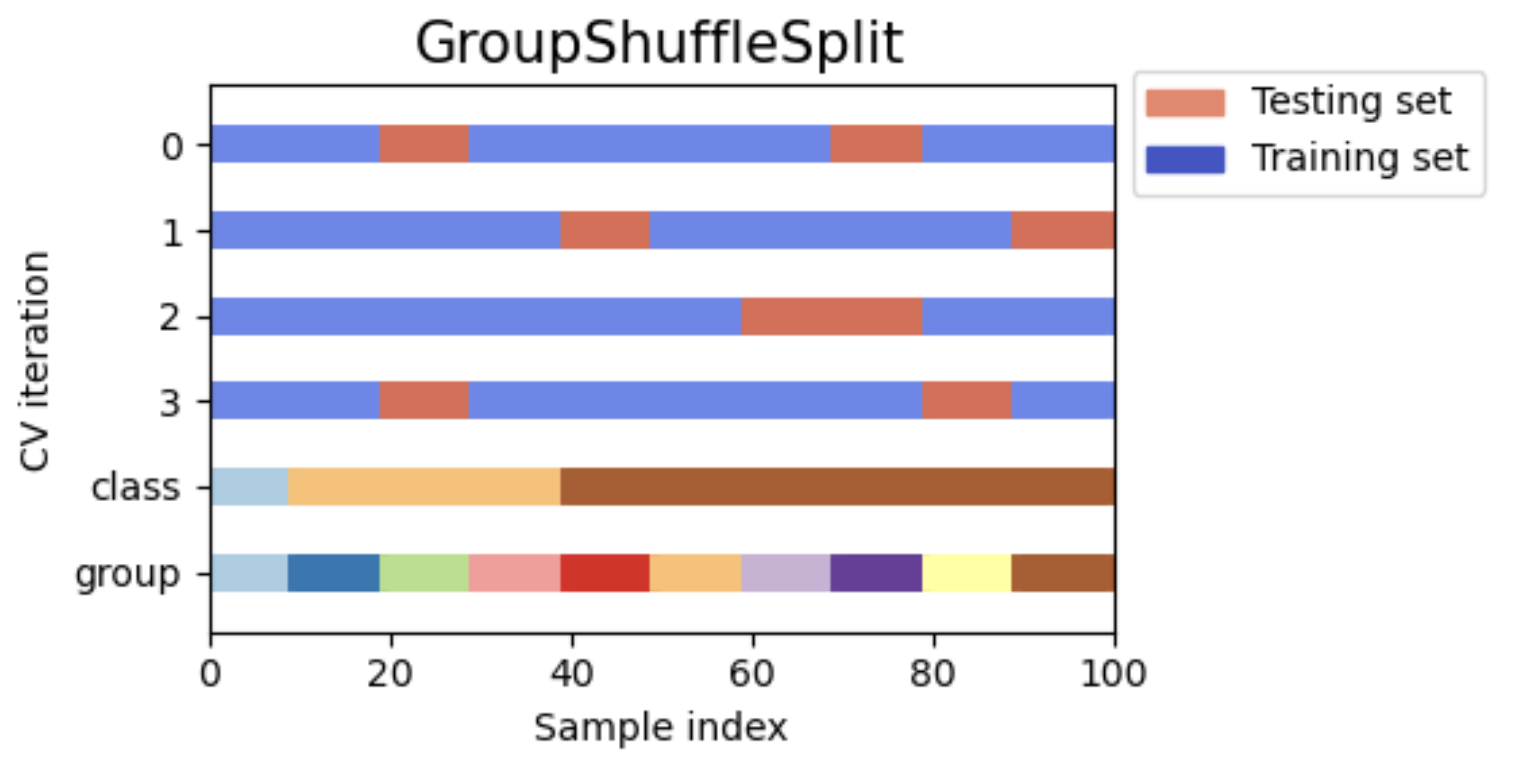

- ShuffleSplit & LPGO의 조합으로 동작함
- class의 치우침을 방지하고 랜덤 분할하는 방식

In [53]:
from sklearn.model_selection import GroupShuffleSplit

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001]
y = ["a", "b", "b", "b", "c", "c", "c", "a"]
groups = [1, 1, 2, 2, 3, 3, 4, 4]
gss = GroupShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3 6 7] [4 5]
[2 3 4 5 6 7] [0 1]
[0 1 2 3 4 5] [6 7]
[0 1 4 5 6 7] [2 3]


## 8. Time Series Split

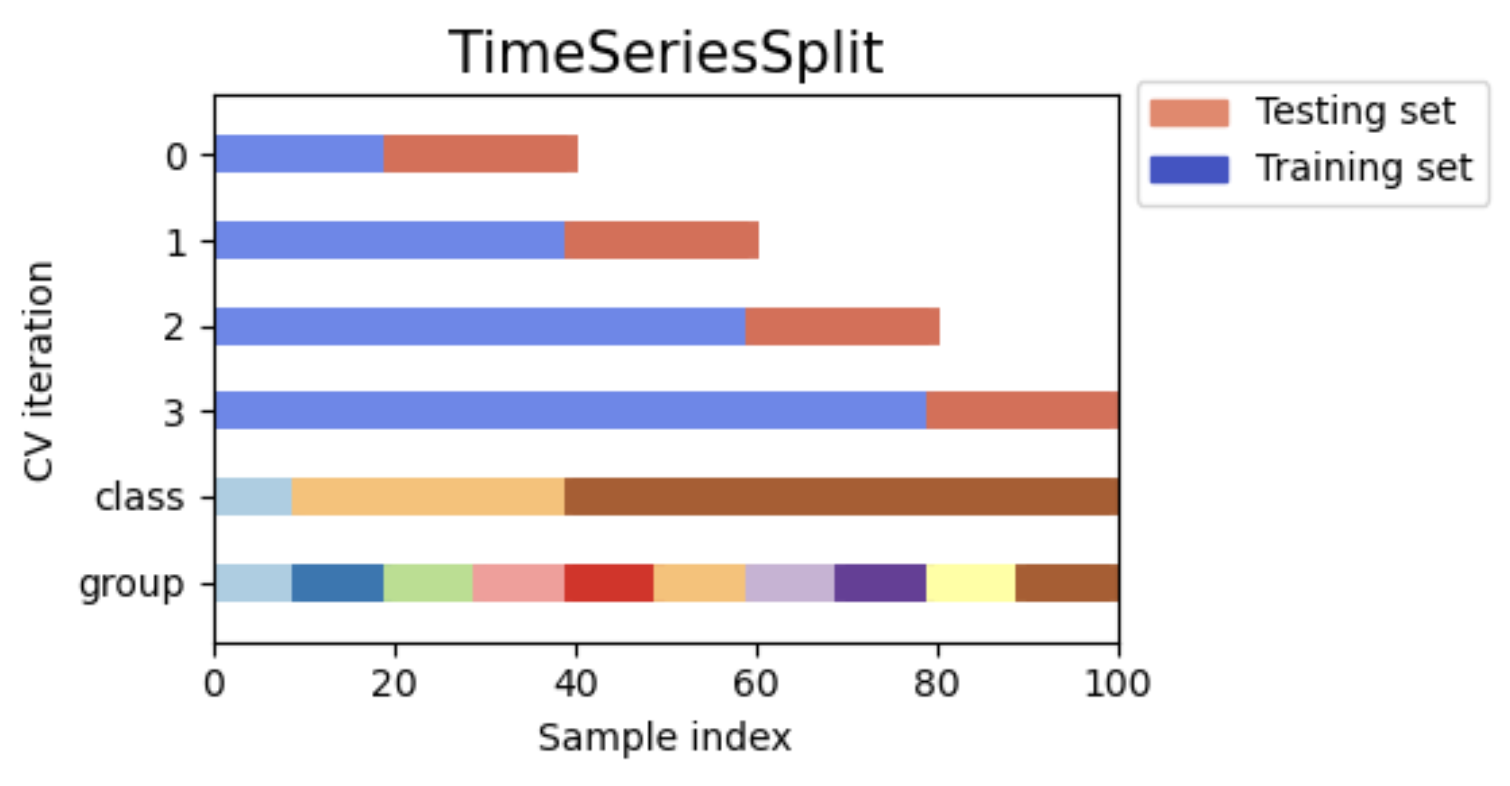

- k번째 fold까지 train fold로 사용하고 k+1번째 fold는 test fold로 사용하는 KFold의 변형
- 앞선 교차검증과 다르게 여기에서의 연속적인 훈련 세트는 그 앞에 있는 것들의 상위 집합. 또한 항상 첫번째 train set에 모든 잉여 데이터를 추가

- 고정된 시간 간격의 시계열 데이터 교차검증에 활용

In [51]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
for train, test in tscv.split(X):
    print("%s %s" % (train, test))

[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


- 데이터들이 독립적이고 동일한 분포를 가진 경우 : 
KFold, RepeatedKFold, LeaveOneOut(LOO), LeavePOutLeaveOneOut(LPO)

- 데이터의 분포가 다른 경우 : 
StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit

- 데이터가 그룹화되어 있는 경우 : 
GroupKFold, LeaveOneGroupOut, LeavePGroupsOut, GroupShuffleSplit

- 데이터가 시계열 데이터인 경우 : 
TimeSeriesSplit

